In [36]:
import os
import shutil
import random
import PIL
import cv2

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [38]:
train_data="DL-datasets/Brain Tumor/Training"

In [39]:
test_data="DL-datasets/Brain Tumor/Testing"

In [40]:
class_list = ['glioma_tumor' , 'meningioma_tumor' , 'no_tumor', 'pituitary_tumor']

In [41]:
import pathlib
train_data=pathlib.Path(train_data)
test_data=pathlib.Path(test_data)

In [42]:
train_data


WindowsPath('DL-datasets/Brain Tumor/Training')

In [43]:
test_data

WindowsPath('DL-datasets/Brain Tumor/Testing')

In [44]:
class_dict_train = {}

for i in range(len(class_list)):
    
    str2=class_list[i]
    str2=str2+'/*'
    list2=list(train_data.glob(str2))
    
    list3 = []
    
    for j in range(len(list2)):
        list3.append(list2[j])
        
    class_dict_train[class_list[i]]=list3

In [45]:
class_dict_train

{'glioma_tumor': [WindowsPath('DL-datasets/Brain Tumor/Training/glioma_tumor/gg (1).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Training/glioma_tumor/gg (10).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Training/glioma_tumor/gg (100).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Training/glioma_tumor/gg (101).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Training/glioma_tumor/gg (102).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Training/glioma_tumor/gg (103).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Training/glioma_tumor/gg (104).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Training/glioma_tumor/gg (105).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Training/glioma_tumor/gg (106).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Training/glioma_tumor/gg (107).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Training/glioma_tumor/gg (108).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Training/glioma_tumor/gg (109).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Training/glioma_tumor/gg

In [46]:
img = cv2.imread(str(class_dict_train[class_list[0]][1]))
img.shape

(512, 512, 3)

In [47]:
img = cv2.imread(str(class_dict_train[class_list[1]][1]))
img.shape

(512, 512, 3)

In [48]:
img = cv2.imread(str(class_dict_train[class_list[2]][1]))
img.shape

(350, 350, 3)

In [49]:
number_dict = {}

for i in range(len(class_list)):
    
    number_dict[class_list[i]]=i
    
number_dict

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [50]:
# Since dimensions are different so we need to resize 

X = [] # It stores the resized image in matrix format
Y = [] # It stores the number of class type from number dict

for class_name,images in class_dict_train.items():
    
    for image in images:
        
        img = cv2.imread(str(image))
        
        resized_img = cv2.resize(img,(180,180))
        
        X.append(resized_img)
        Y.append(number_dict[class_name])

In [51]:
import numpy as np
X_train = np.array(X)
Y_train = np.array(Y)

In [52]:
X_train.shape

(2870, 180, 180, 3)

In [53]:
Y_train.shape

(2870,)

In [54]:
class_dict_test = {}

for i in range(len(class_list)):
    
    str2=class_list[i]
    str2=str2+'/*'
    list2=list(test_data.glob(str2))
    
    list3 = []
    
    for j in range(len(list2)):
        list3.append(list2[j])
        
    class_dict_test[class_list[i]]=list3

In [55]:
class_dict_test

{'glioma_tumor': [WindowsPath('DL-datasets/Brain Tumor/Testing/glioma_tumor/image(1).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Testing/glioma_tumor/image(10).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Testing/glioma_tumor/image(100).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Testing/glioma_tumor/image(11).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Testing/glioma_tumor/image(12).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Testing/glioma_tumor/image(13).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Testing/glioma_tumor/image(14).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Testing/glioma_tumor/image(15).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Testing/glioma_tumor/image(16).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Testing/glioma_tumor/image(17).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Testing/glioma_tumor/image(18).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Testing/glioma_tumor/image(19).jpg'),
  WindowsPath('DL-datasets/Brain Tumor/Testing/glioma_tumor/

In [56]:
# Since dimensions are different so we need to resize 

X_test = [] # It stores the resized image in matrix format
Y_test = [] # It stores the number of class type from number dict

for class_name,images in class_dict_test.items():
    
    for image in images:
        
        img = cv2.imread(str(image))
        
        resized_img = cv2.resize(img,(180,180))
        
        X_test.append(resized_img)
        Y_test.append(number_dict[class_name])

In [57]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [58]:
X_test.shape

(394, 180, 180, 3)

In [59]:
Y_test.shape

(394,)

In [60]:
X_train = X_train/255
X_test = X_test/255

In [61]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
    
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
     layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
     layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(101)
])

In [62]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
90/90 [==============================] - 45s 477ms/step - loss: 1.0549 - accuracy: 0.5934
Epoch 2/10
90/90 [==============================] - 46s 512ms/step - loss: 0.5351 - accuracy: 0.7889
Epoch 3/10
90/90 [==============================] - 47s 525ms/step - loss: 0.3298 - accuracy: 0.8760
Epoch 4/10
90/90 [==============================] - 47s 525ms/step - loss: 0.2071 - accuracy: 0.9240
Epoch 5/10
90/90 [==============================] - 47s 518ms/step - loss: 0.1145 - accuracy: 0.9620
Epoch 6/10
90/90 [==============================] - 47s 523ms/step - loss: 0.0866 - accuracy: 0.9725
Epoch 7/10
90/90 [==============================] - 47s 518ms/step - loss: 0.0579 - accuracy: 0.9826
Epoch 8/10
90/90 [==============================] - 49s 543ms/step - loss: 0.0317 - accuracy: 0.9913
Epoch 9/10
90/90 [==============================] - 49s 549ms/step - loss: 0.0271 - accuracy: 0.9920
Epoch 10/10
90/90 [==============================] - 49s 541ms/step - loss: 0.0511 - accura

In [63]:
#Estimation model's performance

test_loss , test_acc = model.evaluate(X_test,Y_test)
print("Loss = ",test_loss)
print("Accuracy = ",test_acc)

13/13 [==============================] - 4s 208ms/step - loss: 4.6381 - accuracy: 0.7360
Loss =  4.638131618499756
Accuracy =  0.7360405921936035


In [69]:
import random
n = random.randint(0,len(X_test))

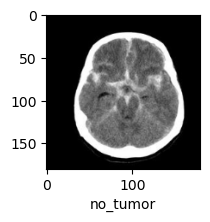

In [70]:
plt.figure(figsize=(15,2))
plt.imshow(X_test[n])
plt.xlabel(class_list[Y_test[n]])
plt.show()

In [71]:
predict_model = model.predict(X_test)
print('predicted class ',class_list[np.argmax(predict_model[n])])

13/13 [==============================] - 1s 89ms/step
predicted class  no_tumor
